# NMC-LCO 18650 배터리 RUL 예측 

## Hwail Natural Energy Institute

## RUL 의미 & 중요성 

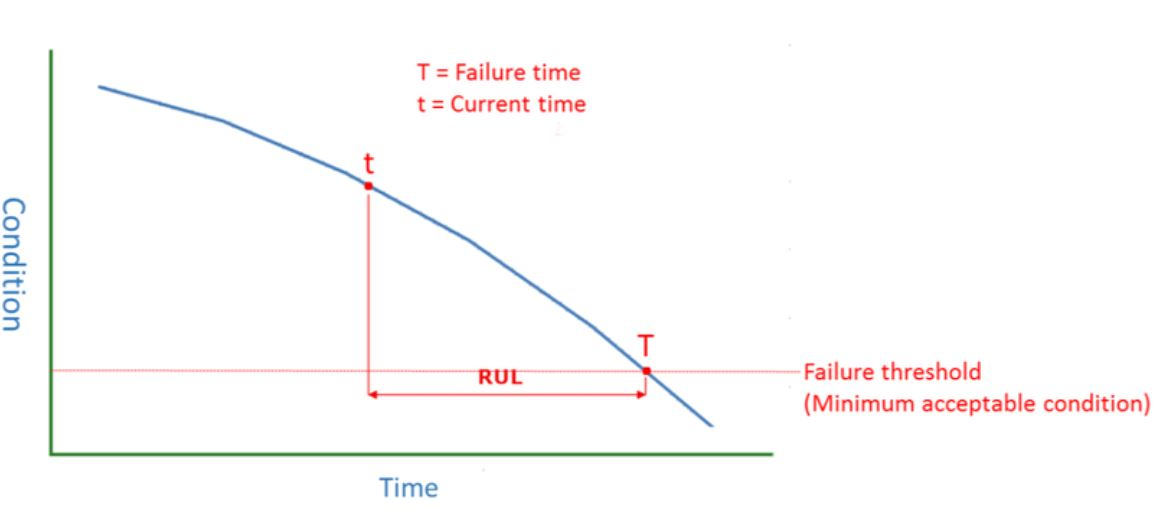

### RUL(Remaining Useful Life)은 제조업에서 상당히 중요한 parameter 

- 제품 수명을 예측하여 스펙을 설정하거나, 공정/설비 이상을 진단하거나
- 설계 조건을 변경하거나 품질 대첵을 세우는 등 
- RUL을 예측할 수 있다면 상당한 이점들이 있다. 이로 인해 많은 분야에서 연구 중 

### 각 컬럼의 의미

- Cycle Index: number of cycle
- F1: Discharge Time (s)
- F2: Decrement 3.6-3.4V (s)
- F3: Max. Voltage Discharge (V) 

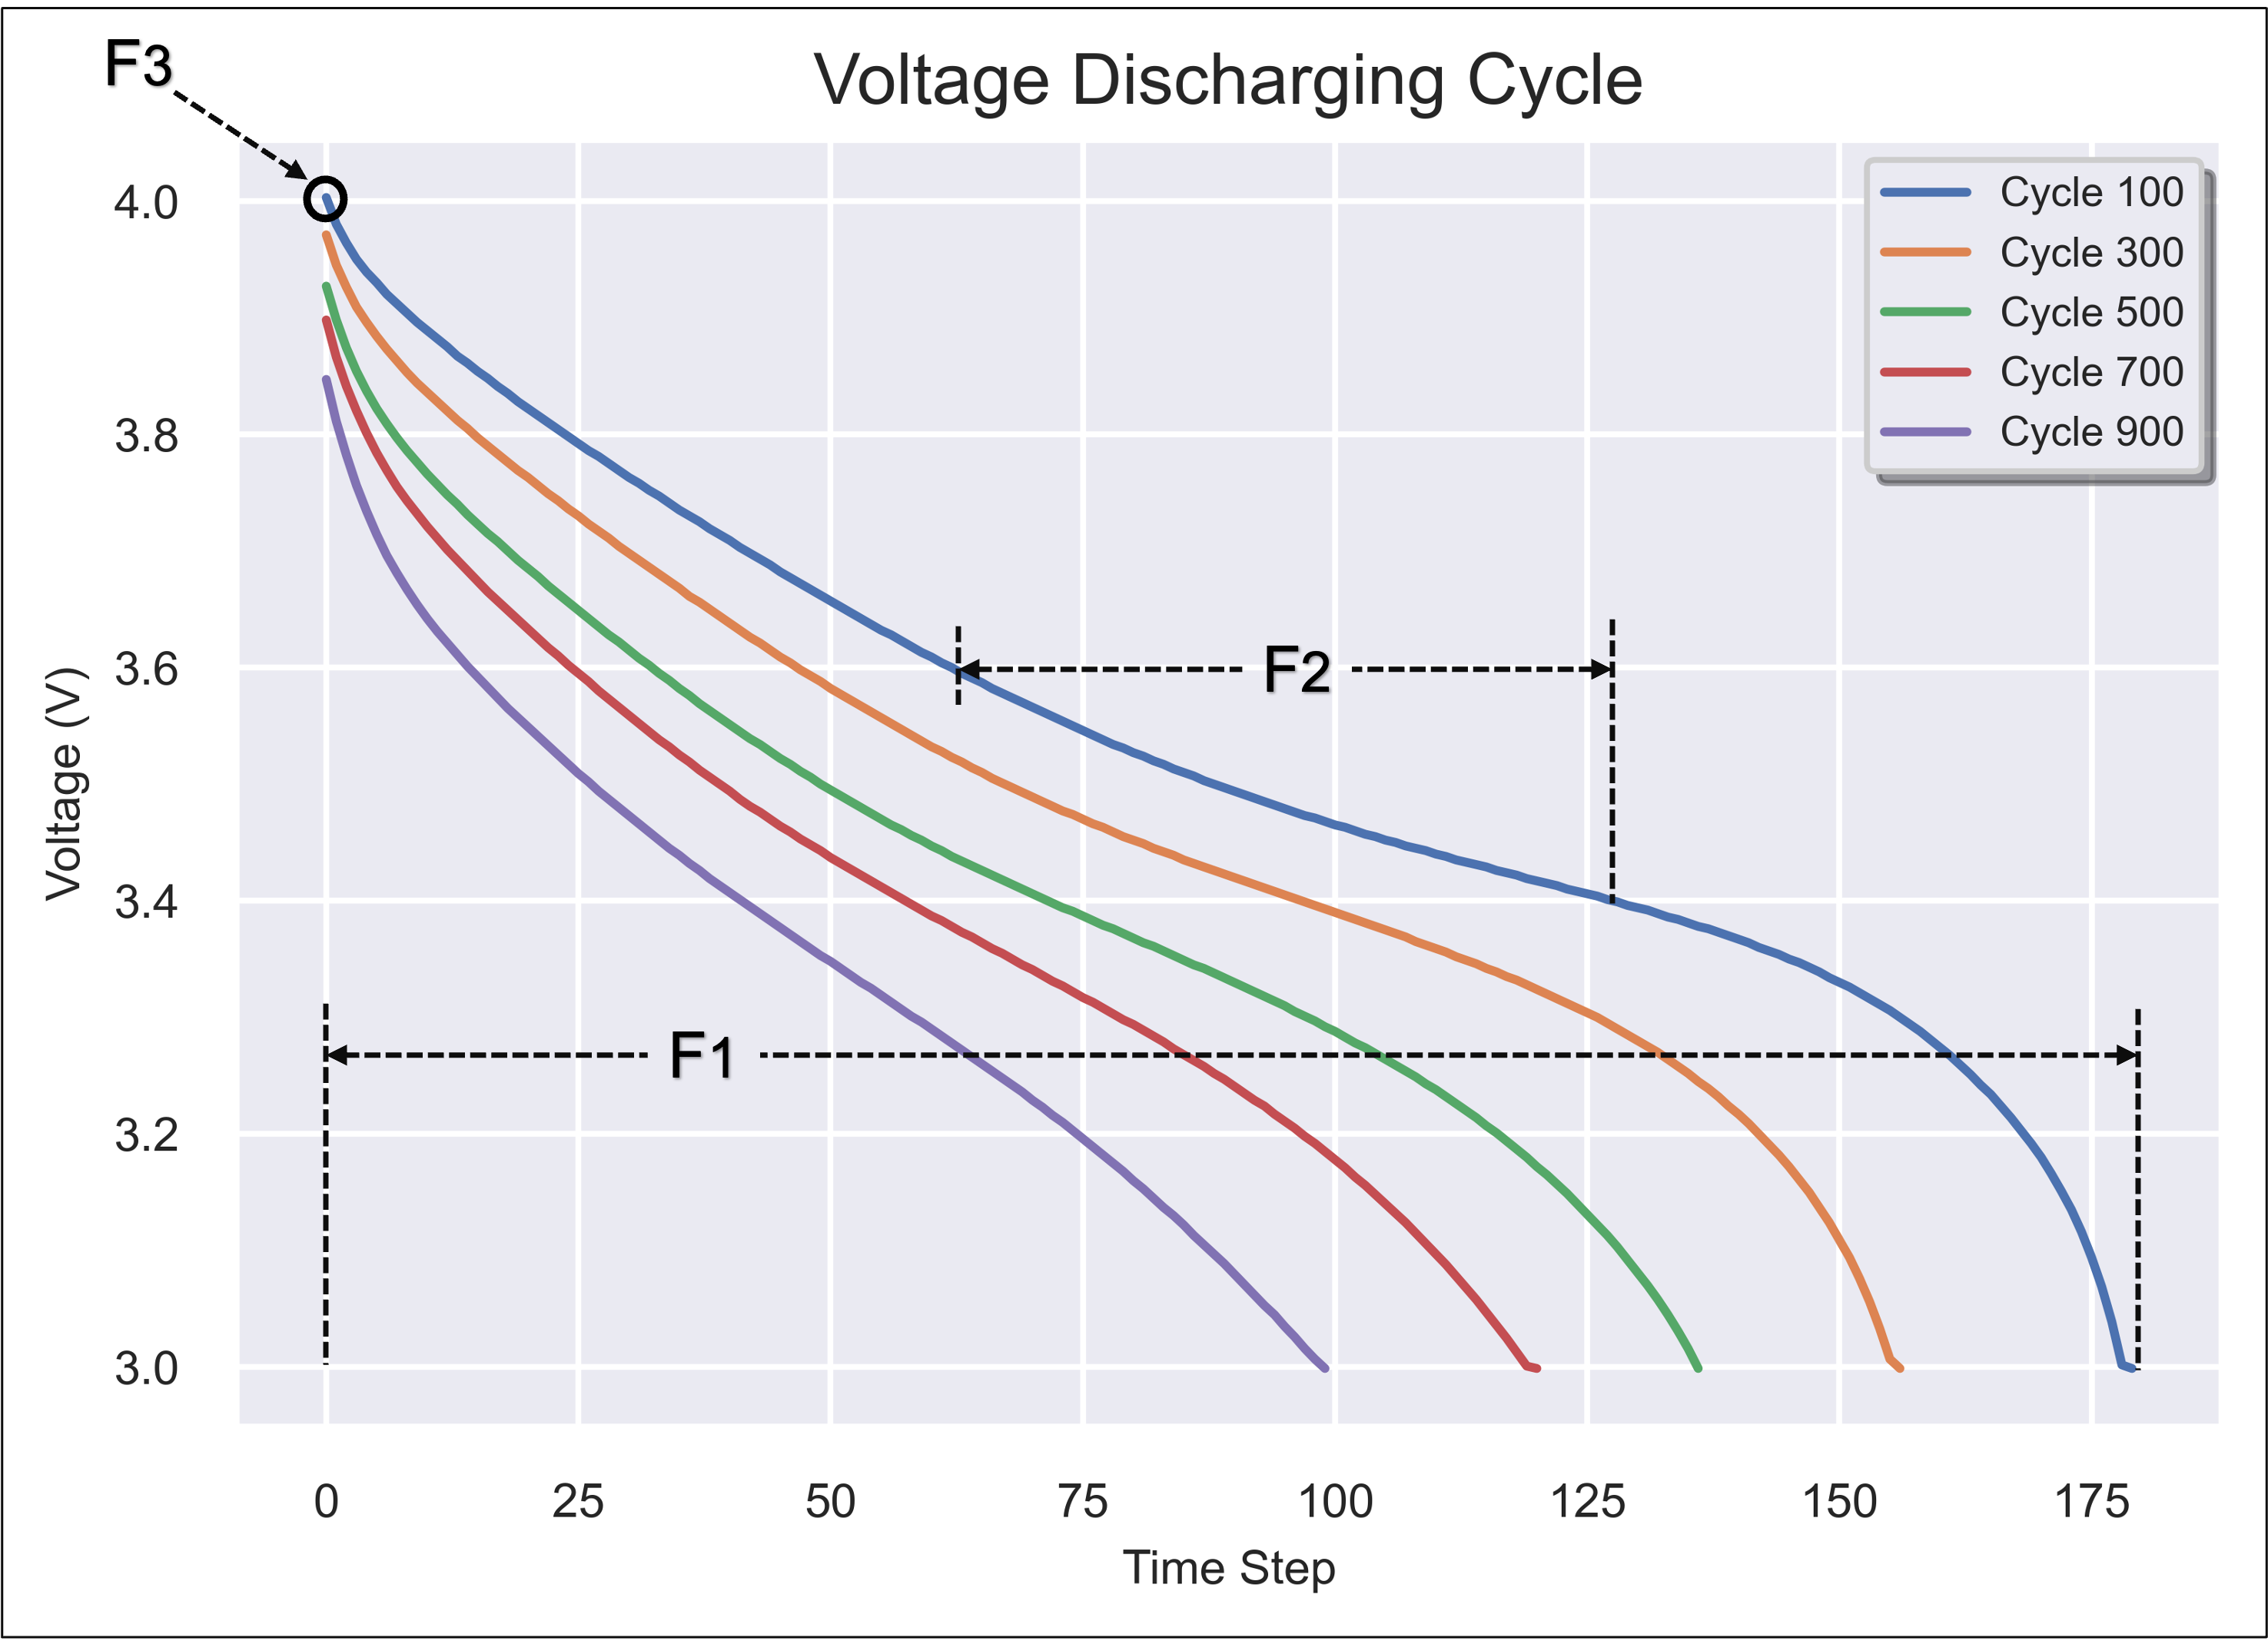
  

- F4: Min. Voltage Charge (V)
- F5: Time at 4.15V (s)

![3.png](attachment:3.png)

- F6: Time Constant Current (s)
- F7: Charging Time (s)
- Total time (s)
- RUL: target

![2.png](attachment:2.png)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('Battery_RUL_data.csv')
df

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [7]:
df.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [9]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [13]:
df.columns

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')

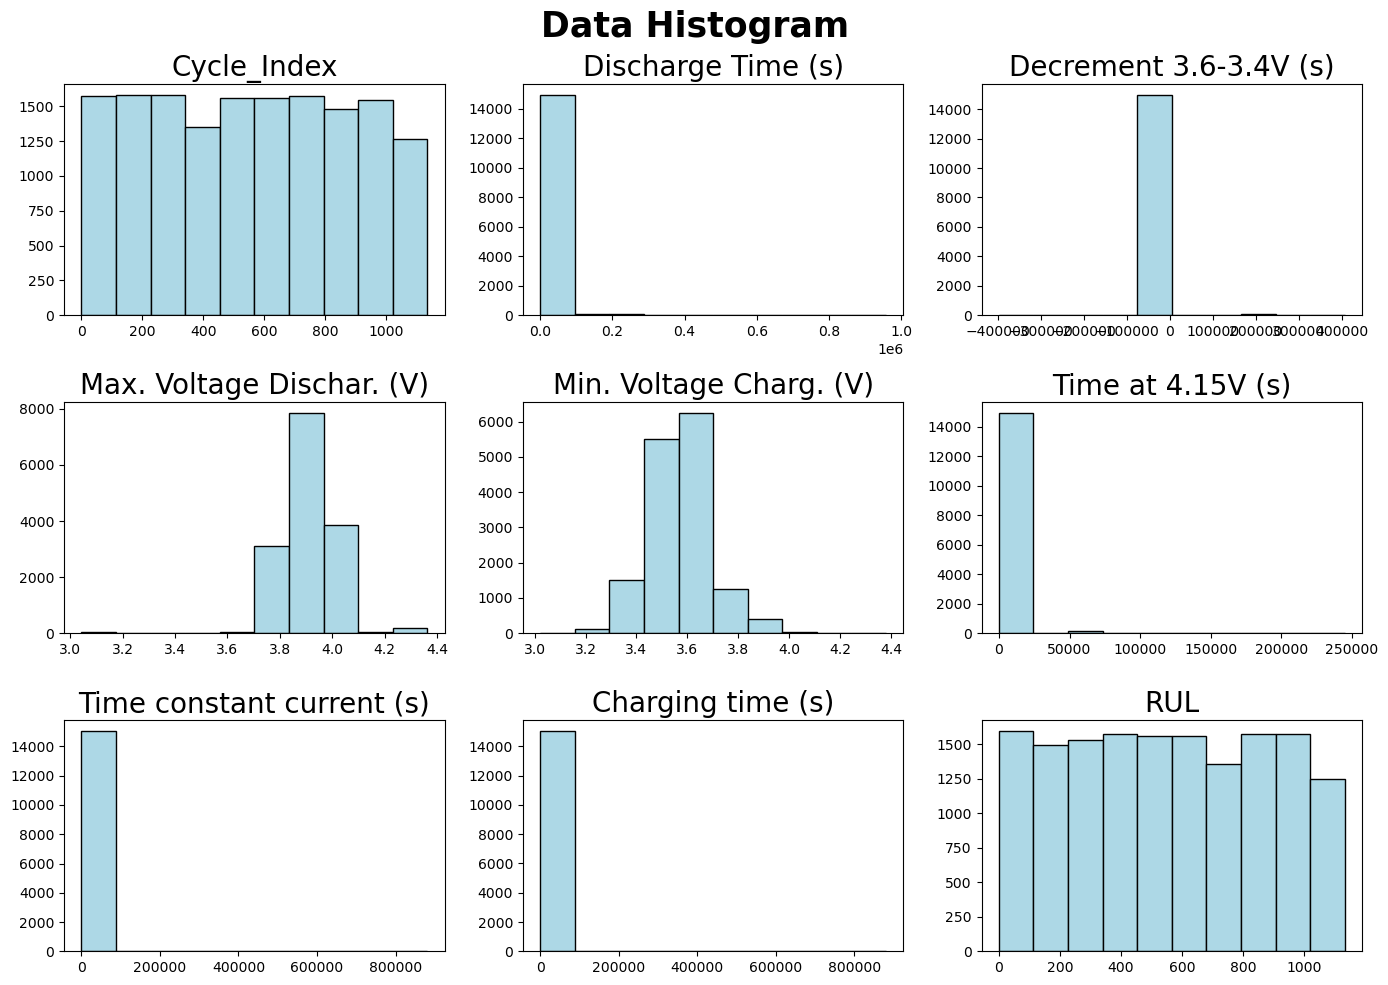

In [14]:
fig = plt.figure(figsize=(14,10))

plt.suptitle('Data Histogram', fontsize = 25, fontweight = 'bold')
plt.subplots_adjust(top=0.98)

for i in range(len(df.columns)) :
    plt.subplot(3,3,i+1)
    plt.title(df.columns[i],fontsize=20)
    plt.hist(df[df.columns[i]],edgecolor = 'black', color = 'lightblue')
    
plt.tight_layout()
plt.show()

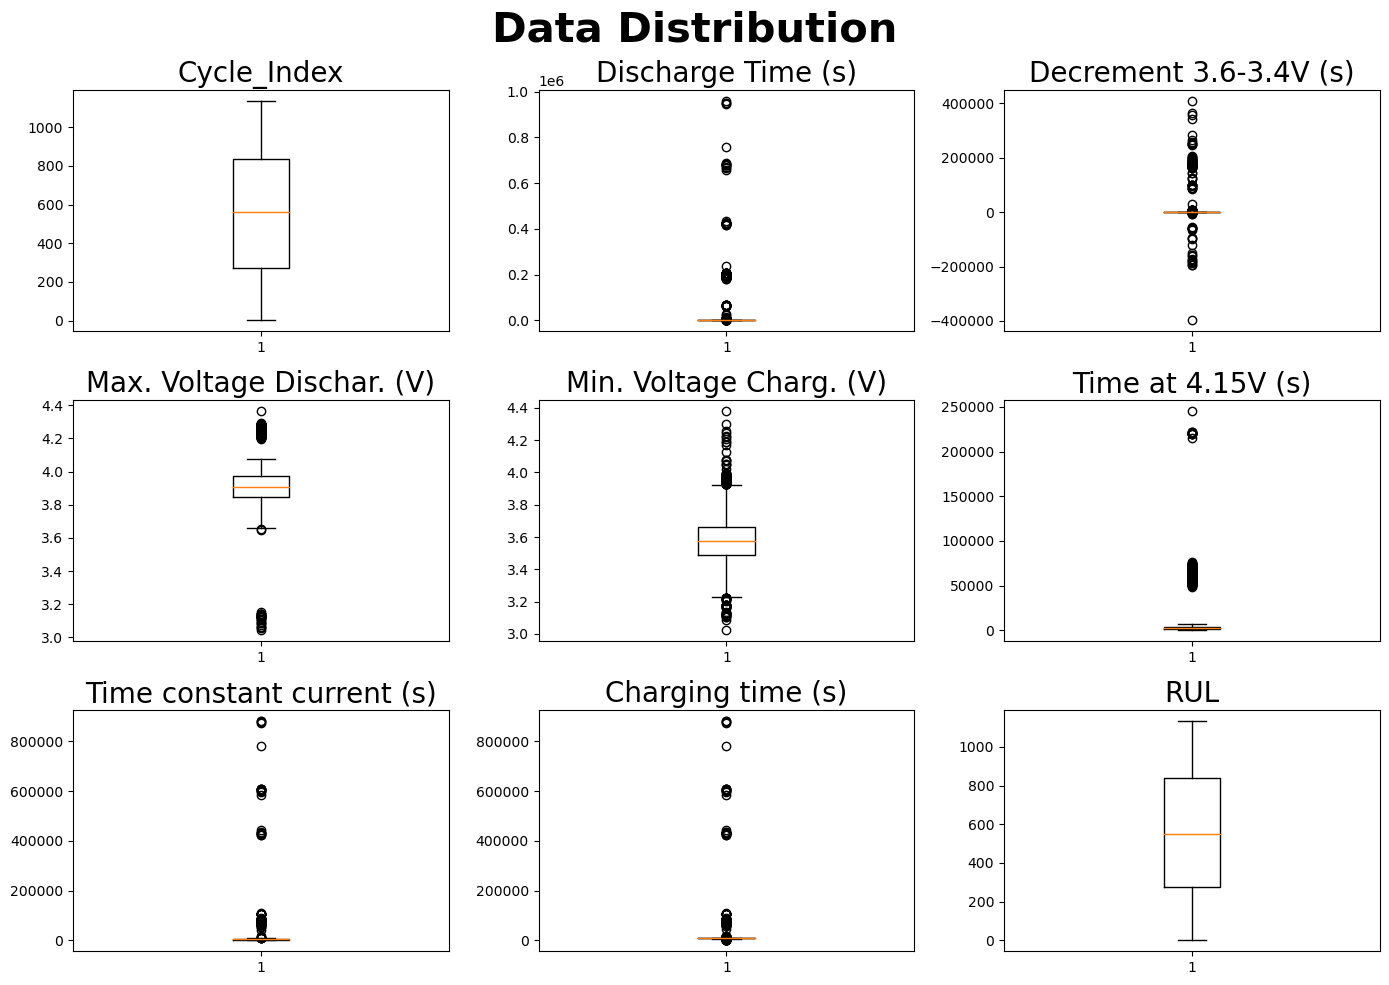

In [16]:
fig = plt.figure(figsize=(14,10))

plt.suptitle('Data Distribution',fontsize=30,fontweight='bold')
plt.subplots_adjust(top=0.98)

for i in range(len(df.columns)) :
    plt.subplot(3,3,i+1)
    plt.title(df.columns[i],fontsize=20)
    plt.boxplot(df[df.columns[i]])
    
plt.tight_layout()
plt.show()

### 이상치가 많은 것들 

1. Discharge Time
2. Decrement 
3. Time at 4.5V
4. Time constant current
5. Charging time 

이 정도 이상치라면 실제 현업으로 생각해 봤을 때
  
1) 계측 시스템 구성상 데이터 노이즈가 많거나
  
2) 계측 조건이 아예 잘못댔거나
  
3) 센서가 이상이거나
  
크게 3가지 중 하나

### 이상치를 날려보자 

Box plot 기준 Q1 - 1.5*IQR보다 작거나, Q3 + 1.5*IQR보다 큰 값을 이상치(Outlier)로 판단하고 제거 

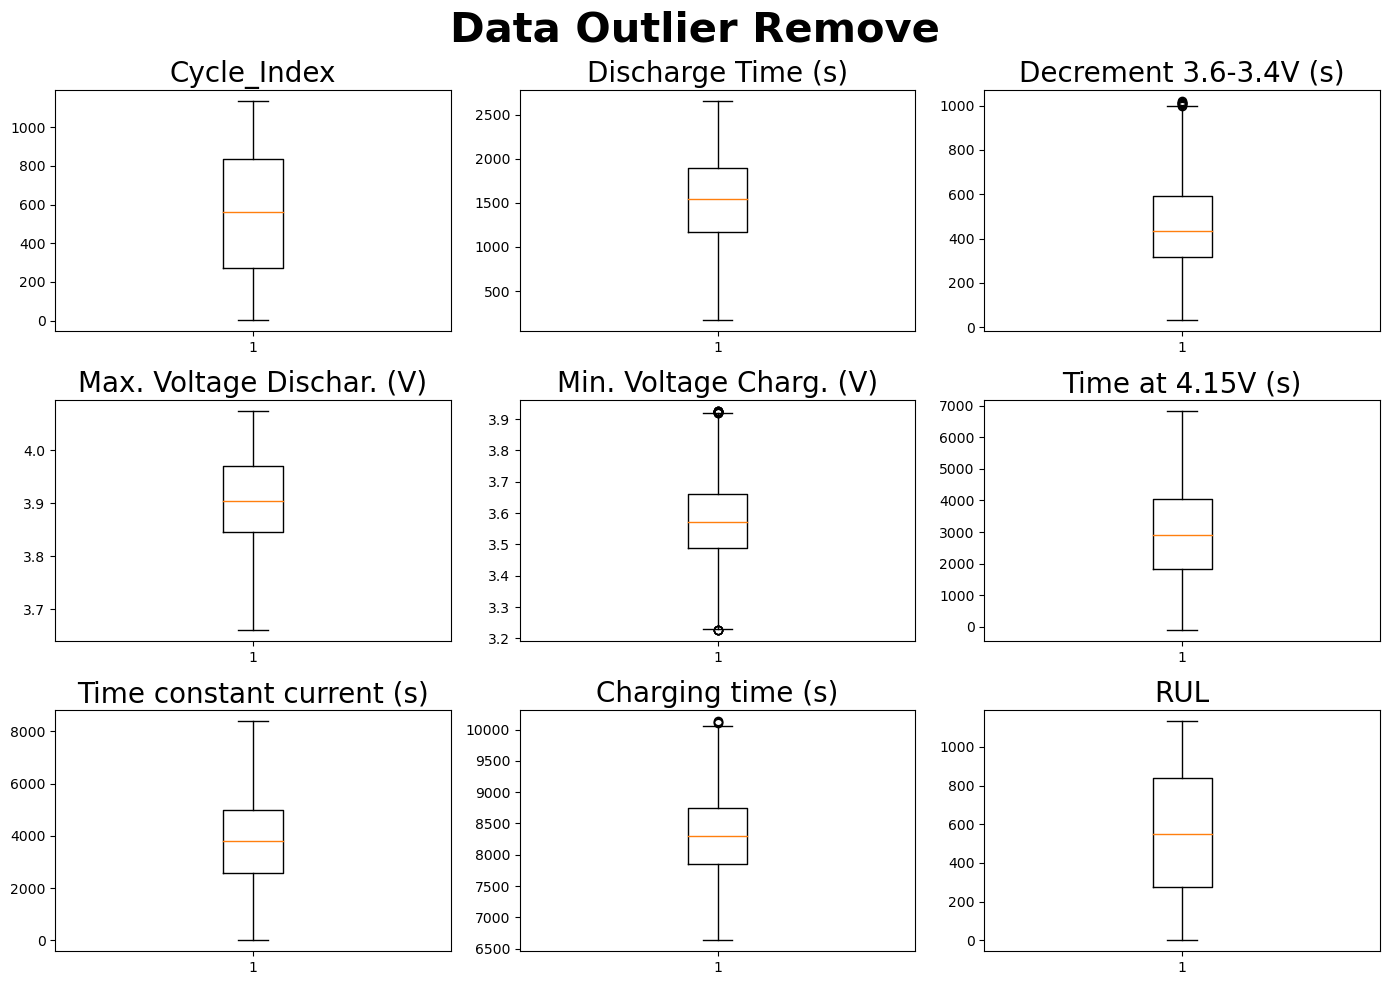

In [17]:
fig = plt.figure(figsize=(14,10))

plt.suptitle('Data Outlier Remove',fontsize=30,fontweight='bold')
plt.subplots_adjust(top=0.98)

df2 = pd.DataFrame(columns=df.columns)

for i in range(len(df.columns)) :
    plt.subplot(3,3,i+1)
    plt.title(df.columns[i],fontsize=20)
    data = df[df.columns[i]]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1 
    upper_bound = q3 + 1.5*iqr 
    lower_bound = q1 - 1.5*iqr
    
    data = data[(data>lower_bound) & (data < upper_bound)]
    df2[df.columns[i]] = data
    plt.boxplot(data)
    
plt.tight_layout()
plt.show()

-> 이상치가 날라가고 깔끔

In [18]:
df2

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,NaN,3.670,NaN,5460.001,6755.01,NaN,1112
1,2.0,NaN,NaN,NaN,NaN,5508.992,6762.02,NaN,1111
2,3.0,NaN,NaN,NaN,NaN,5508.993,6762.02,NaN,1110
3,4.0,NaN,NaN,NaN,NaN,5502.016,6762.02,NaN,1109
4,6.0,NaN,NaN,NaN,3.398,5480.992,NaN,NaN,1107
...,...,...,...,...,...,...,...,...,...
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2
15062,1111.0,773.88,162.374667,3.763,3.839,539.375,1148.00,7660.62,1


In [19]:
df2.isnull().sum()

Cycle_Index                    0
Discharge Time (s)           322
Decrement 3.6-3.4V (s)       285
Max. Voltage Dischar. (V)    257
Min. Voltage Charg. (V)      245
Time at 4.15V (s)            167
Time constant current (s)    189
Charging time (s)            445
RUL                            0
dtype: int64

### 이상치를 없애는 방법으로 통계적 대푯값 이용, 도메인 지식 이용 등을 사용 가능하지만 이번 데이터는 행의 개수가 많으므로, 이상치가 있는 행을 다 지우고 진행 예정

In [20]:
df2 = df2.dropna()
df2.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

In [21]:
df2

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
16,18.0,2259.46,883.199000,4.042,3.373,5181.377,6161.38,9310.98,1095
17,19.0,2256.61,878.400000,4.042,3.374,5181.375,6154.37,9296.64,1094
18,20.0,2252.83,873.601000,4.043,3.374,5174.334,6147.33,9243.58,1093
19,21.0,2250.62,868.801000,4.044,3.374,5160.289,6140.29,9245.53,1092
20,22.0,2248.60,868.797000,4.044,3.375,5160.321,6133.34,9248.32,1091
...,...,...,...,...,...,...,...,...,...
15058,1107.0,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5
15059,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
15060,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
15061,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2


-> 결측치가 날아가 index가 꼬여있는 문제 reset_index를 해주어 초기화 

In [22]:
df3 = df2.reset_index(drop=True) # index 초기화 
df3

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,18.0,2259.46,883.199000,4.042,3.373,5181.377,6161.38,9310.98,1095
1,19.0,2256.61,878.400000,4.042,3.374,5181.375,6154.37,9296.64,1094
2,20.0,2252.83,873.601000,4.043,3.374,5174.334,6147.33,9243.58,1093
3,21.0,2250.62,868.801000,4.044,3.374,5160.289,6140.29,9245.53,1092
4,22.0,2248.60,868.797000,4.044,3.375,5160.321,6133.34,9248.32,1091
...,...,...,...,...,...,...,...,...,...
14440,1107.0,773.00,180.480000,3.774,3.742,922.712,1412.31,6659.62,5
14441,1108.0,770.44,179.523810,3.773,3.742,922.775,1412.38,6678.88,4
14442,1109.0,771.12,179.523810,3.773,3.744,915.512,1412.31,6670.38,3
14443,1110.0,769.12,179.357143,3.773,3.742,915.513,1412.31,6637.12,2


## 이상치 안 날렸을 때 상관 계수

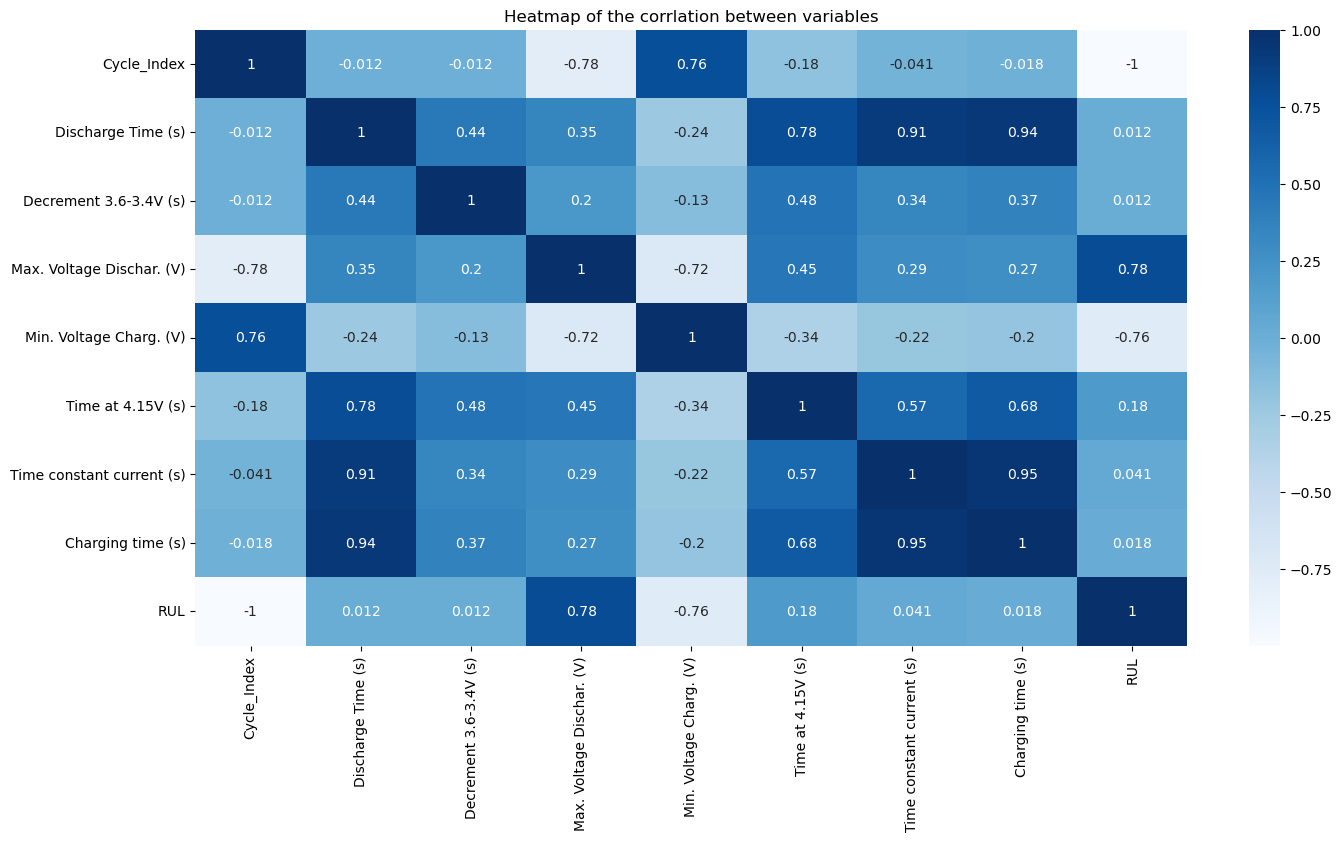

In [23]:
plt.figure(figsize=(16,8))

corr = df.corr()

sns.heatmap(corr,annot=True,cmap='Blues')

plt.title('Heatmap of the corrlation between variables')

plt.show()

## 이상치 날렸을 때 상관계수

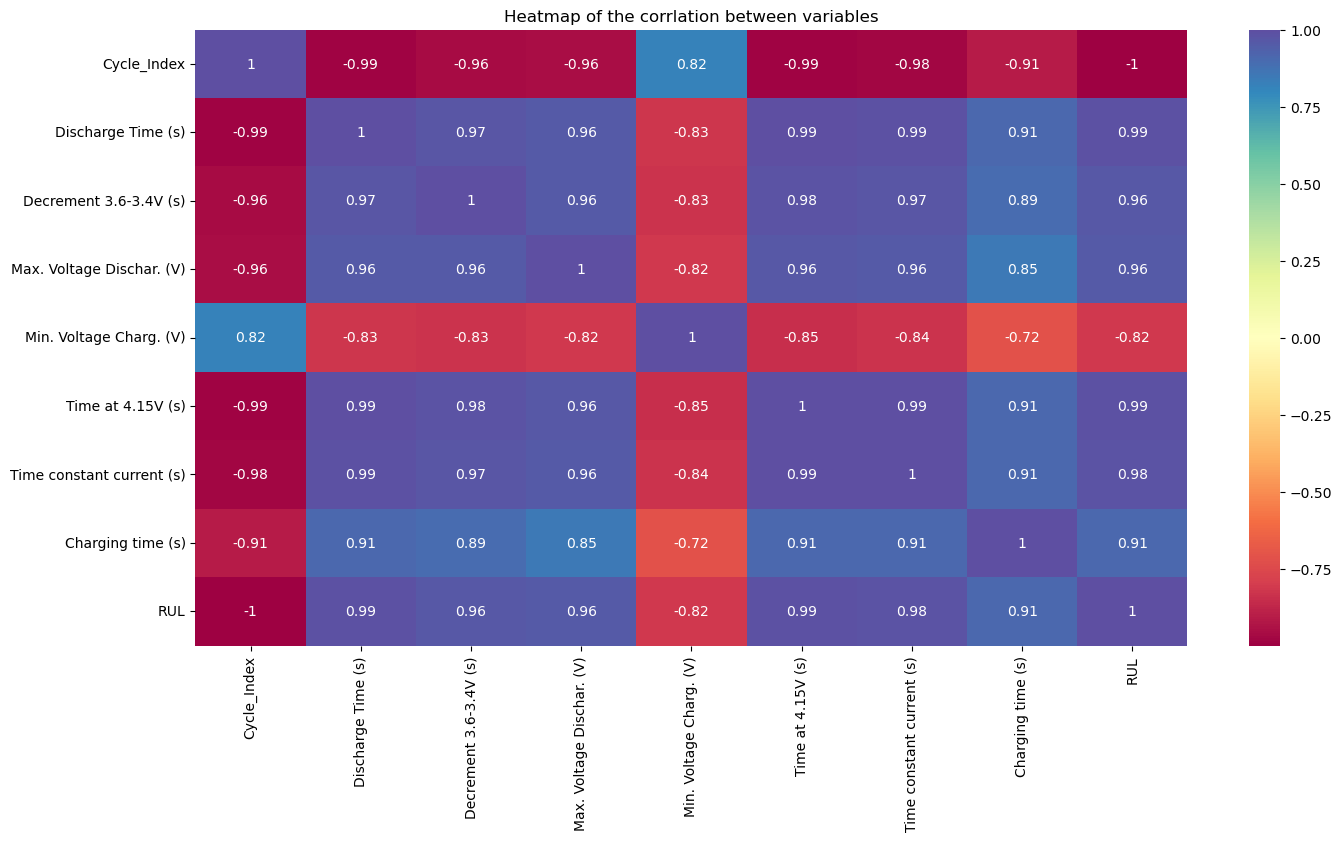

In [24]:
plt.figure(figsize=(16,8))

corr = df3.corr()

sns.heatmap(corr,annot=True,cmap='Spectral')

plt.title('Heatmap of the corrlation between variables')

plt.show()

- 서로 상관성이 이렇게 크면, 각각이 영향을 주는 인자일 수 있음

- 아니면 실제 연관성이 크기 때문에 이런 형태를 나타낼 수 있음 
- 각각 인자 분석을 해봐야함 이럴 때도 자신의 분야 이해가 필요
- <span style="color: red;"> 진짜 연관이 있나? 아니면 값만 이렇게 나오는건가 등 판단 필요 </span>

- 컬럼이 많았다면 상관 계수가 큰 값들을 다 버렸을 것 (일정 기준 이상 제거)
- 하지만 상관성이 큰 값들을 버리면 남는 데이터가 너무 없어짐

  → 이럴때는 우선 전체 다 진행한 후 모델 결과에 따라 판단함

In [39]:
X = df3.drop(['Cycle_Index','RUL'],axis=1)
y = df3['RUL']

### 정규화할 때 y는 정규화를 안한다
### 데이터 오염 문제 있을 수 있기 때문에

In [40]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler()
X_norm = sc.fit_transform(X)

In [41]:
X_norm

array([[0.99203134, 0.93611404, 0.97515528, ..., 0.98121195, 0.69647179,
        0.76524123],
       [0.99067952, 0.93003106, 0.97515528, ..., 0.98121153, 0.69551268,
        0.76113722],
       [0.98888657, 0.92394807, 0.97826087, ..., 0.97974455, 0.69454945,
        0.74595179],
       ...,
       [0.28607477, 0.0441682 , 0.13975155, ..., 0.09242471, 0.04669844,
        0.00951879],
       [0.28512612, 0.04395694, 0.13975155, ..., 0.09242492, 0.04669844,
        0.        ],
       [0.28738391, 0.02243074, 0.10869565, ..., 0.01405708, 0.01053523,
        0.292919  ]])

In [42]:
from sklearn.model_selection import train_test_split 

### 회귀는 셔플을 하면 안된다. 뒤에를 예측하는 거니까 ( 앞과 뒤를 나누기만 하자 )

X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size = 0.3, shuffle = False)

In [43]:
from sklearn.metrics import mean_squared_error

In [44]:
from sklearn.ensemble import RandomForestRegressor 

rf = RandomForestRegressor() # 분류 + 회귀 둘다 가능

rf.fit(X_train,y_train) 

y_predictions = rf.predict(X_test)

print('R-squared error : ' + "{:.2%}".format(rf.score(X_test,y_test)))
print('Root Mean Squared error : ' + "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False)))

R-squared error : 94.48%
Root Mean Squared error : 76.21


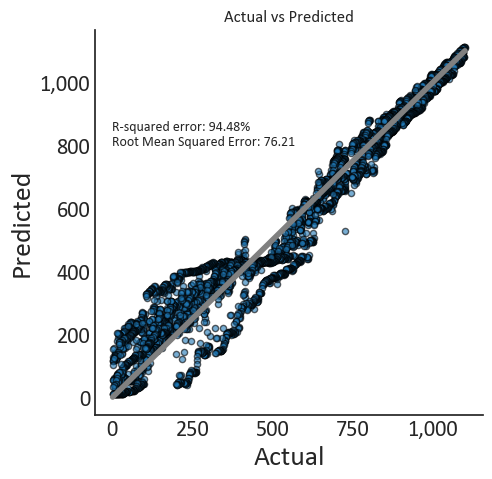

In [45]:
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize']=5,5 
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['axes.labelsize']=20
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['legend.fontsize']=16

fig,ax = plt.subplots()
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

g = sns.scatterplot(x=y_test,
                y=y_predictions,
                s=20,
                alpha=0.6,
                linewidth=1,
                edgecolor='black',
                ax=ax)

f = sns.lineplot(x=[min(y_test),max(y_test)],
             y=[min(y_test),max(y_test)],
             linewidth=4,
             color='gray',
             ax=ax)

plt.annotate(text=('R-squared error: '+ "{:.2%}".format(rf.score(X_test,y_test)) +'\n' +
                  'Root Mean Squared Error: '+ "{:.2f}".format(mean_squared_error(y_test,y_predictions,squared=False))),
             xy=(0,800),
             size='medium')

xlabels = ['{:,.0f}'.format(x) for x in g.get_xticks()]
g.set_xticklabels(xlabels)

ylabels = ['{:,.0f}'.format(x) for x in g.get_yticks()]
g.set_yticklabels(ylabels)

sns.despine()

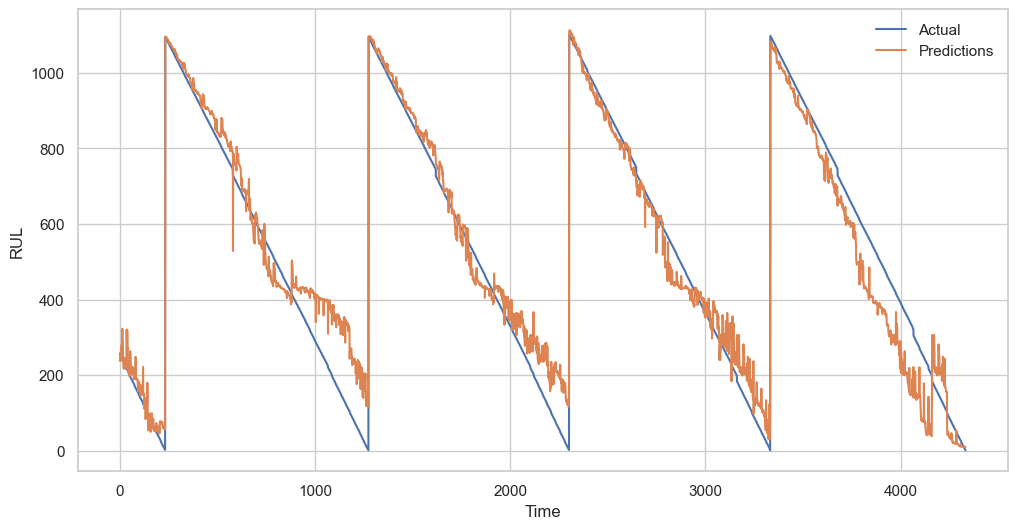

In [47]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))

sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual') # 실제값

sns.lineplot(x=range(len(y_predictions)), y=y_predictions, label='Predictions') # 예측값

plt.xlabel('Time')  #실제로는 cycle인데, Time으로 표현함
plt.ylabel('RUL')

plt.legend()

plt.show()


### 추가적으로 해볼 수 있는 것

1. 이상치 제거 안한다면 ?
2. 상관계수가 큰 애들을 지웠다면 ?

## <center> 🌟 취업 어필 포인트 🌟 <center>
    
####    0.<span style="color: red;"> Hawaii Natural Energy Institute에서 공개한 실제 NMC-LCO 18650 배터리 시험 데이터를 활용해서 데이터 분석을 진행함
    
####    1. <span style="color: red;"> 배터리 RUL에 영향을 주는 여러 인자들 중 충방전 할때 변화하는 값들의 의미를 이해하였고, 실제 분석도 진행했음 </span>
    
    
####    2. <span style="color: red;">   데이터를 확인 결과 이상치가 많이 있었는데, 이를 해결하기 위해 통계적 방법을 적용함 </span>

    
    
#### 3. 실제 현업에서도 여러 가지 이유로 이상치가 나올 수 있음. 대표적인 것들이 노이즈, 센서 이상, 데이터 계측 시스템 이상 등이 있음
   - 이러한 상황에 대비하여 통계적 접근을 통해 데이터를 지우거나, 현업 지식을 사용하는 것이 중요하단 것을 알았음

#### 4. 또한, 데이터들간의 상관성 분석을 진행하였는데, 상관성이 높은 데이터들이 있었음. 이럴 때도 여러 가지 판단 요건에 의해 데이터를 가공함 (실제로 연관이 있는지, 데이터의 형태는 어떤지, 현업 지식으로 판단하였을 때 실제로 연관성이 서로 있는 데이터인지 등 종합적인 판단이 필요함)

   

#### 5. <span style="color: red;"> 또한 회귀 머신러닝 알고리즘을 사용하여 모델을 구축하였고, 배터리 RUL을 측정하였음. 선형 회귀는 분류와 다른 평가 지표를 사용하는데, 그 중 R^2, RMSE 평가 지표에서 각각 95%, 76 정도의 성능을 보임. RUL을 잘 예측하는 모델을 만들 수 있었음 </span>

   - 실제 현업에선 데이터들간의 관계를 분석하여 회귀 예측을 하는 경우가 있음
   - 특히 공정이나 설비에서 가속도, 전류, 전압 등 다양한 센서에서 시계열 데이터가 나오고 이를 예측하는 경우가 많음
    
   - 또한 설계에서 설계 spec을 정할 때 시험을 많이 진행함. 신뢰성 시험의 경우 가속 수명 시험을 하며 각각의 수명이 나오고, 
     그 수명에 따라 설계 조건을 정하는데, 이 때도 통계 분석과 회귀 분석이 사용 됨
    
   - 품질 측면에서 살펴보면 품질 비용도 회귀식으로 예측할 수 있음
    
   - 추가적으로 해볼 것은 머신러닝을 이용한 회귀식 뿐만 아니라 딥러닝을 이용한 회귀식도 공부하여, 나중에 실제 데이터에 적용하여
     000을 개선해보고 싶음 (추후에 해보고 싶음을 어필. 당장은 아니고, 앞으로의 나만의 꿈, 이루고 싶은 목표, 성장 방향성 느낌으로)
    